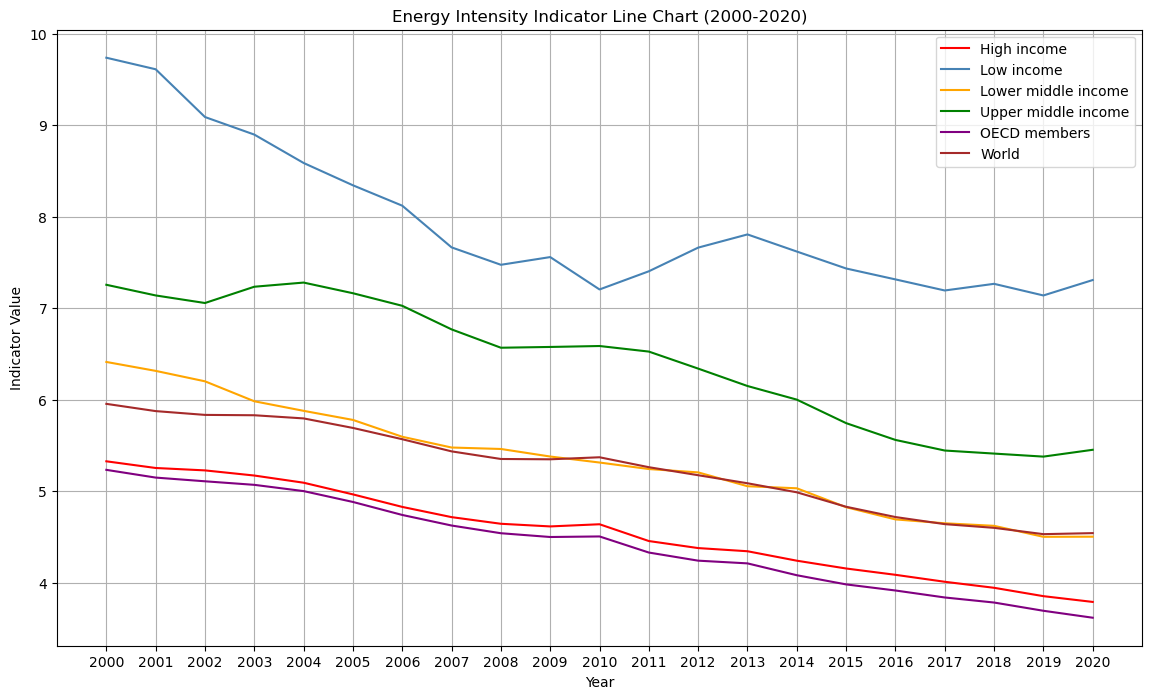

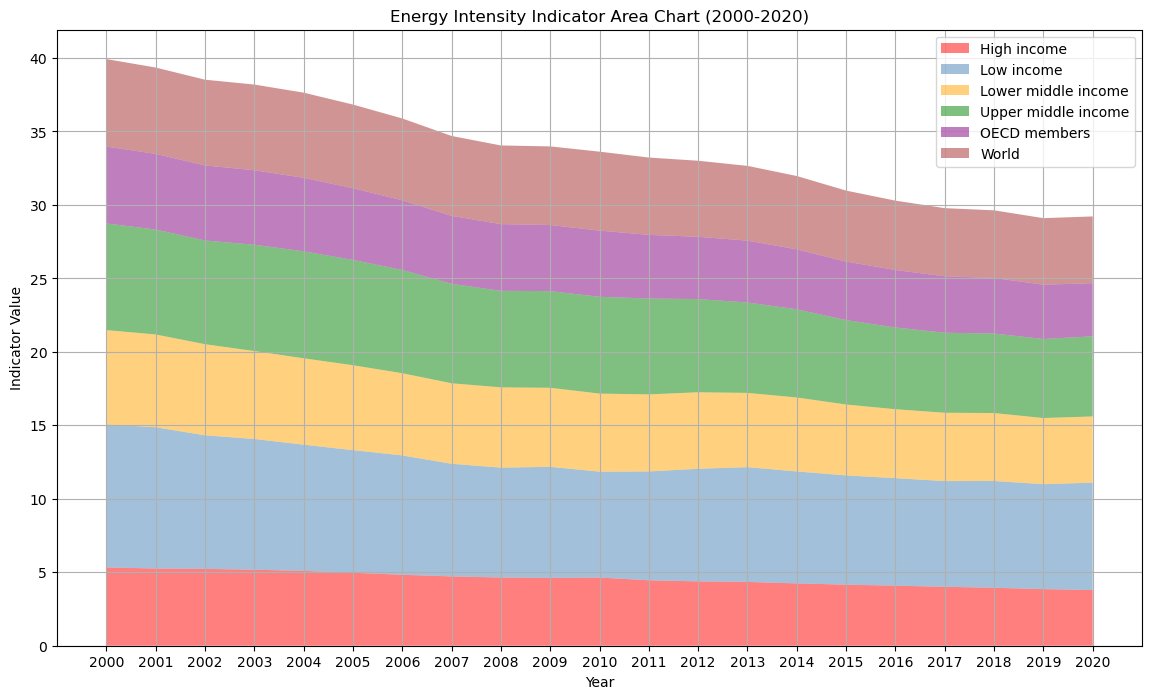

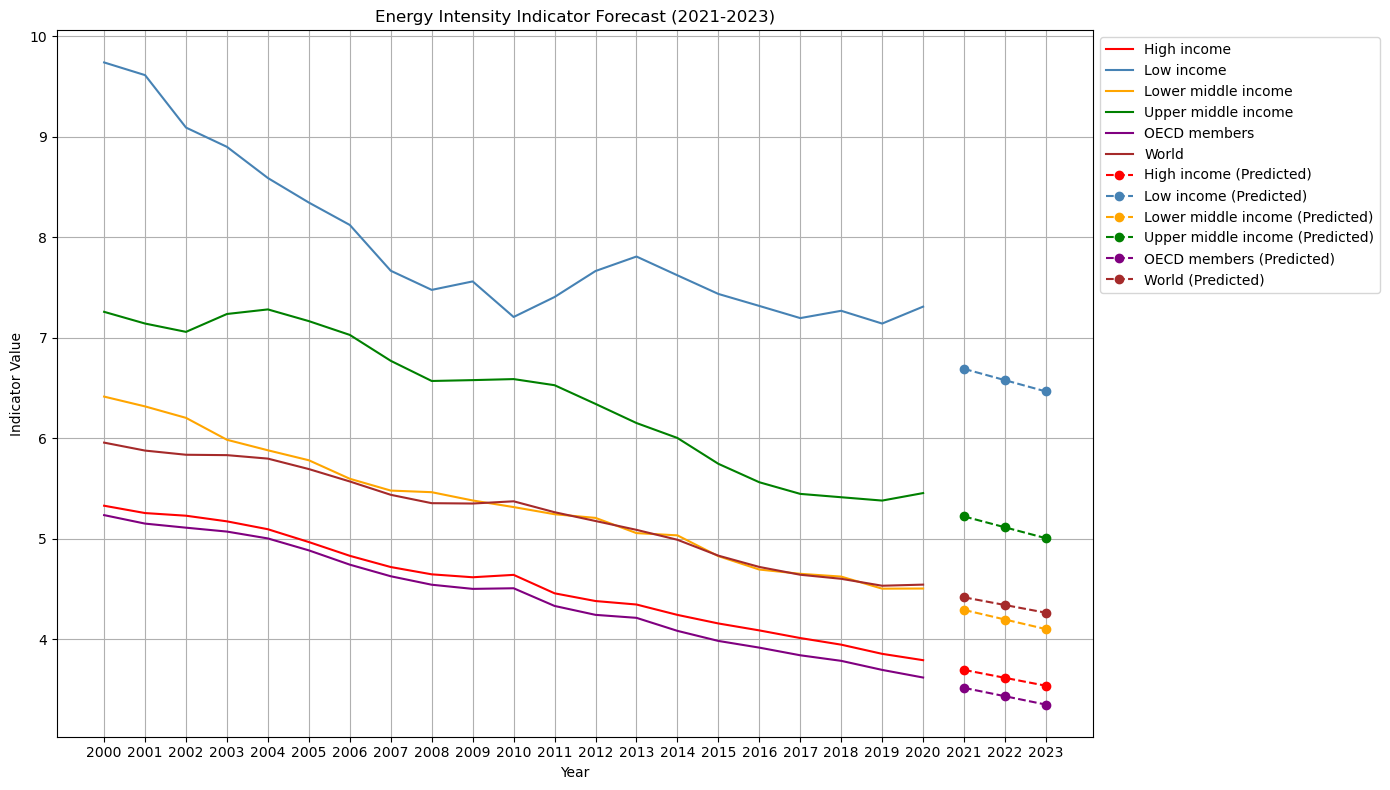

Predicted Value (%)
-------------------
                         2021      2022      2023
Country Name                                     
High income          3.693709  3.614967  3.536225
Low income           6.689941  6.577455  6.464968
Lower middle income  4.290758  4.195349  4.099940
Upper middle income  5.221345  5.112926  5.004506
OECD members         3.515149  3.431825  3.348500
World                4.416253  4.339587  4.262921

Predicted Value vs. 2020 (%)
----------------------------
                     2021   2022   2023
Country Name                           
High income         -2.56  -4.64  -6.71
Low income          -8.47 -10.01 -11.55
Lower middle income -4.73  -6.85  -8.97
Upper middle income -4.26  -6.25  -8.24
OECD members        -2.84  -5.15  -7.45
World               -2.78  -4.47  -6.16


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Remove warning
import warnings
warnings.filterwarnings('ignore')

# Load the CSV file into a DataFrame
file_path = 'CSV_7.3.1.csv'
df = pd.read_csv(file_path, skiprows=4)

# Define the groups of interest and filter the DataFrame
groups = ["Low income", "Lower middle income", "Upper middle income", "High income", "OECD members", "World"]
filtered_df = df[df['Country Name'].isin(groups)]

# Define the colors as per user's request
colors_dict = {
    "Low income": 'steelblue',
    "Lower middle income": 'orange',
    "Upper middle income": 'green',
    "High income": 'red',
    "OECD members": 'purple',
    "World": 'brown'
}

# Filter the columns to only include years from 2000 to 2020
years_columns = [str(year) for year in range(2000, 2021)]
filtered_years_df = filtered_df[['Country Name'] + years_columns]

# Plot the existing Line Chart (Chart 5.13)
plt.figure(figsize=(14, 8))
for index, row in filtered_years_df.iterrows():
    plt.plot(years_columns, row[years_columns], label=row['Country Name'], color=colors_dict[row['Country Name']])
plt.title('Energy Intensity Indicator Line Chart (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Indicator Value')
plt.legend()
plt.grid(True)
plt.show()

# Prepare data for stacked area chart(Chart 5.14)
stacked_data = filtered_years_df.set_index('Country Name')[years_columns].T

# Plot the existing Stacked Area Chart
plt.figure(figsize=(14, 8))
plt.stackplot(stacked_data.index, stacked_data.values.T, labels=stacked_data.columns, colors=[colors_dict[group] for group in stacked_data.columns], alpha=0.5)
plt.title('Energy Intensity Indicator Area Chart (2000-2020)')
plt.xlabel('Year')
plt.ylabel('Indicator Value')
plt.legend()
plt.grid(True)
plt.show()

# Initialize an empty DataFrame to store predictions
predicted_df = pd.DataFrame()

# Initialize the model
model = LinearRegression()

for index, row in filtered_years_df.iterrows():
    # Prepare the data
    X = np.array(range(len(years_columns))).reshape(-1, 1)  # Years as numerical values
    y = row[years_columns].values  # Indicator values
    
    # Train the model
    model.fit(X, y)
    
    # Predict for 2021, 2022, and 2023 (years 21, 22, and 23 from 2000)
    predictions = model.predict(np.array([[21], [22], [23]]))
    
    # Append to the predicted_df DataFrame
    predicted_df = predicted_df.append(pd.Series([row['Country Name'], predictions[0], predictions[1], predictions[2]], index=['Country Name', '2021_pred', '2022_pred', '2023_pred']), ignore_index=True)

# Add the actual values for 2020 to the predicted_df
predicted_df['2020_actual'] = filtered_years_df['2020'].values

# Calculate the percentage changes for 2021, 2022, and 2023 compared to 2020
predicted_df['2021_change'] = ((predicted_df['2021_pred'] - predicted_df['2020_actual']) / predicted_df['2020_actual']) * 100
predicted_df['2022_change'] = ((predicted_df['2022_pred'] - predicted_df['2020_actual']) / predicted_df['2020_actual']) * 100
predicted_df['2023_change'] = ((predicted_df['2023_pred'] - predicted_df['2020_actual']) / predicted_df['2020_actual']) * 100

# Remove the index column to delete the first column on the left-hand side
predicted_df.set_index('Country Name', inplace=True)

# Plot the Line Chart with both actual and predicted values (Chart 5.15)
plt.figure(figsize=(14, 8))

# Plot actual values for 2000-2020 in solid lines
for index, row in filtered_years_df.iterrows():
    plt.plot(years_columns, row[years_columns], label=row['Country Name'], color=colors_dict[row['Country Name']])

# Plot predicted values for 2021-2023 in dotted lines
predicted_years = ['2021', '2022', '2023']
for index, row in predicted_df.iterrows():
    plt.plot(predicted_years, [row['2021_pred'], row['2022_pred'], row['2023_pred']], 'o--', color=colors_dict[index], label=f"{index} (Predicted)")

plt.title('Energy Intensity Indicator Forecast (2021-2023)')
plt.xlabel('Year')
plt.ylabel('Indicator Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


# Use linear regression to generate predictions (Table 5.3)

# Initialize the model
lr = LinearRegression()

# Create columns for predicted values and changes
predicted_values = []
changes = []

# Loop through each group and generate predictions
for index, row in filtered_years_df.iterrows():
    X = np.array(list(range(2000, 2021))).reshape(-1, 1)
    y = row[years_columns].values
    lr.fit(X, y)
    
    # Predict for 2021, 2022, and 2023
    predictions = lr.predict(np.array([[2021], [2022], [2023]]))
    
    predicted_values.append(predictions)
    changes.append((predictions - y[-1]) / y[-1] * 100)  # % change relative to 2020

# Convert lists to DataFrame
predicted_df = pd.DataFrame(predicted_values, columns=['2021_pred', '2022_pred', '2023_pred'])
predicted_df['Country Name'] = filtered_years_df['Country Name'].values
predicted_df = predicted_df.set_index('Country Name')

changes_df = pd.DataFrame(changes, columns=['2021_change', '2022_change', '2023_change'])
changes_df['Country Name'] = filtered_years_df['Country Name'].values
changes_df = changes_df.set_index('Country Name')

# Merge the two dataframes
predicted_df = pd.concat([predicted_df, changes_df], axis=1)

# Display the two tables

print("Predicted Value (%)")
print("-------------------")
print(predicted_df[['2021_pred', '2022_pred', '2023_pred']].rename(columns={
    '2021_pred': '2021',
    '2022_pred': '2022',
    '2023_pred': '2023'
}))

print("\nPredicted Value vs. 2020 (%)")
print("----------------------------")
print(predicted_df[['2021_change', '2022_change', '2023_change']].round(2).rename(columns={
    '2021_change': '2021',
    '2022_change': '2022',
    '2023_change': '2023'
}))

# Python codes are available on GitHub at: https://github.com/BlockQuant18/SU-PHD-TM
